In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')

In [2]:
# https://code.visualstudio.com/docs/datascience/data-science-tutorial

data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

<Axes: xlabel='survived', ylabel='fare'>

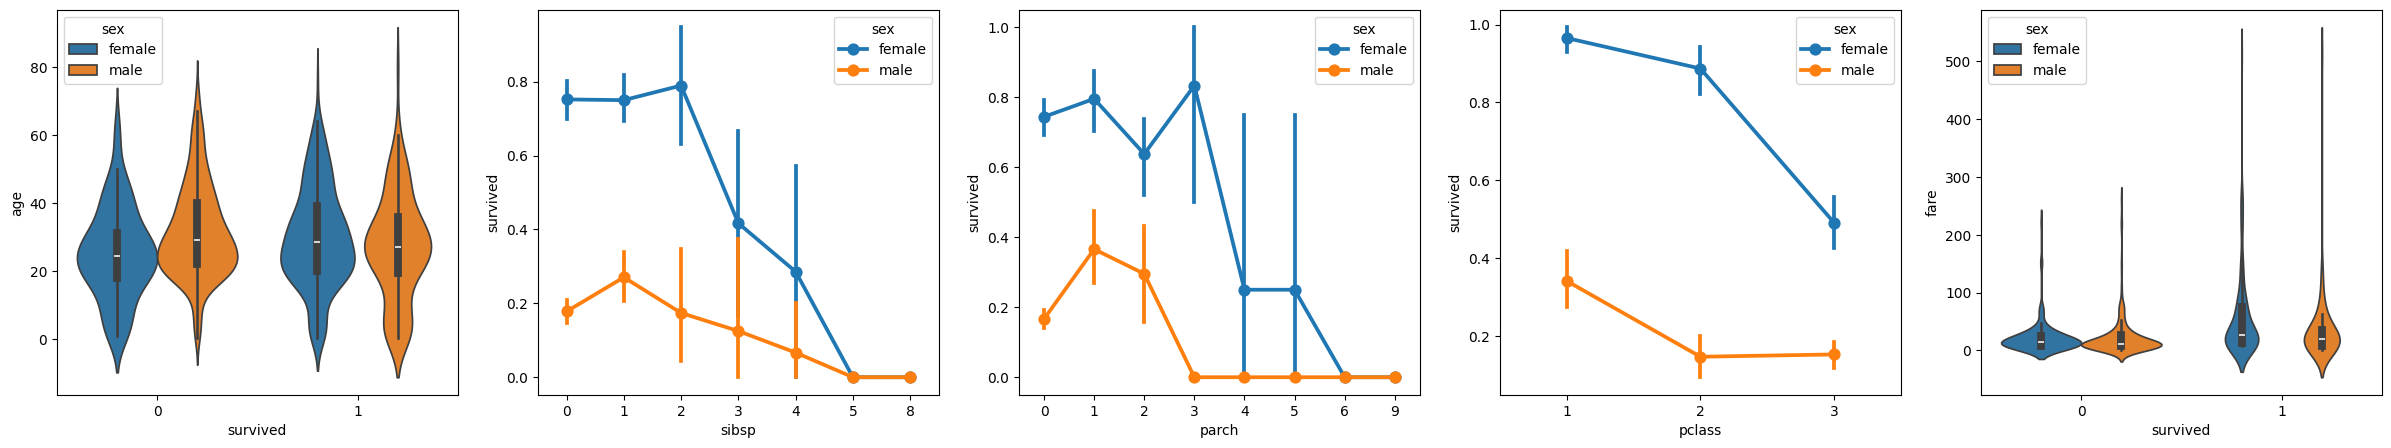

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [6]:
data.replace({'male': 1, 'female': 0}, inplace=True)

C:\Users\dwory\AppData\Local\Temp\ipykernel_21432\2851430834.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'male': 1, 'female': 0}, inplace=True)


In [4]:
pip install seaborn

     ---------------------------------------- 0.0/168.5 kB ? eta -:--:--
     -- ------------------------------------- 10.2/168.5 kB ? eta -:--:--
     ------------------------- ------------ 112.6/168.5 kB 2.2 MB/s eta 0:00:01
     ------------------------------------ - 163.8/168.5 kB 2.0 MB/s eta 0:00:01
     ------------------------------------ - 163.8/168.5 kB 2.0 MB/s eta 0:00:01
     ------------------------------------ - 163.8/168.5 kB 2.0 MB/s eta 0:00:01
     ------------------------------------ - 163.8/168.5 kB 2.0 MB/s eta 0:00:01
     ------------------------------------ - 163.8/168.5 kB 2.0 MB/s eta 0:00:01
     ------------------------------------ 168.5/168.5 kB 460.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   -------------------------------------- - 286.7/294.9 kB 8.9 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 8.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [8]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [9]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [13]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


Neutral Network

In [15]:
pip install keras

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     --------------------------------- ------ 41.0/48.7 kB ? eta -:--:--
     --------------------------------- ------ 41.0/48.7 kB ? eta -:--:--
     -------------------------------------- 48.7/48.7 kB 409.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ------------------------- -------------- 0.8/1.2 MB 24.4 MB/s eta 0:00:01
   ---------------------------------------  1.2/1.2 MB 25.7 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 15.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------  133.1/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
   ---------------------------------------  3.0/3.0 MB 93.1 MB/s eta 0:00:01
   -----------------------------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
pip install tensorflow

     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ---------------------------------- ----- 51.2/59.7 kB 2.7 MB/s eta 0:00:01
     -------------------------------------- 59.7/59.7 kB 798.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.0/390.3 MB 20.9 MB/s eta 0:00:19
   ---------------------------------------- 4.7/390.3 MB 50.2 MB/s eta 0:00:08
    --------------------------------------- 7.6/390.3 MB 60.5 MB/s eta 0:00:07
   - -------------------------------------- 10.2/390.3 MB 59.0 MB/s eta 0:00:07
   - -------------------------------------- 16.9/390.3 MB 81.8 MB/s eta 0:00:05
   -- ------------------------------------- 19.8/390.3 MB 93.9 MB/s eta 0:00:04
   -- ------------------------------------- 20.4/390.3 MB 72.6 MB/s eta 0:00:06
   -- ------------------------------------- 20.6/390.3 MB 59.5 MB/s eta 0:00:07
   -- ------------------------------------- 21.3/390.3 MB 46

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [19]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

c:\Users\dwory\Documents\PythonEnviron\.environ\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66 (264.00 B)

 Trainable params: 66 (264.00 B)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5547 - loss: 0.6927   
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5764 - loss: 0.6907 
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5998 - loss: 0.6853 
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5698 - loss: 0.6778 
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5965 - loss: 0.6570 
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5961 - loss: 0.6336 
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5993 - loss: 0.6087 
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5971 - loss: 0.5886 
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6048 - loss: 0.5774 
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7315 - loss: 0.5666 
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7652 - loss: 0.5705 
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [22]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
0.8133971291866029
